**нелинейная регрессия, метод градиентного спуска**

Евгений Борисов  <esborisov@sevsu.ru>

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

## генерируем данные

In [2]:
n_samples=500
X = np.linspace(-1,1,n_samples).reshape(-1,1)
y = np.sin((X)*2.9)+np.random.rand(n_samples).reshape(-1,1)
# y = y.flatten()
X.shape,y.shape

((500, 1), (500, 1))

In [3]:
# from sklearn.preprocessing import MinMaxScaler
# # масштабируем признаки в [-1,1]
# X = MinMaxScaler([-1.,1.]).fit(X).transform(X)

In [4]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit(X).transform(X)

# X.shape, y.shape

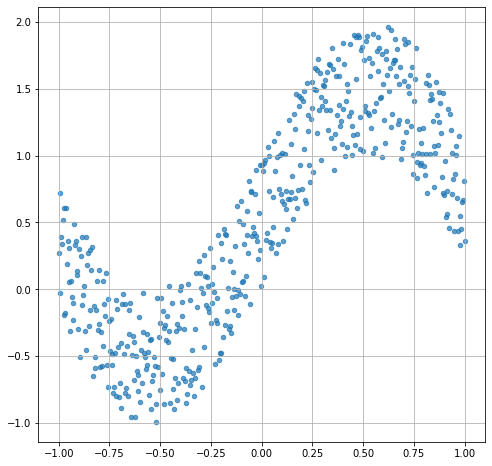

In [5]:
# рисуем исходные данные
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.grid()
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_degree = 3 # степень полинома

# собираем полином, добавляем столбец из единиц (свободный член)
poly = PolynomialFeatures(poly_degree).fit(X)
Xp = poly.transform(X)
Xp.shape

(500, 4)

## модель 

$$a(x,w) = \sum\limits_{i=1} x_i \cdot w_i + w_0$$

In [7]:
def model(x,w): # модель регересии
    return x.dot(w)[:,np.newaxis]

## обучаем модель

функция потери
$$L=MSQE(y,o)=\frac{1}{m}\sum\limits_{i=0}^m(o_i-y_i)^2$$

In [8]:
def msqe(y,o): # средняя квадратичная ошибка - ф-ция потери
    d = o-y 
    return d.T.dot(d).flatten()[0]/len(y)

loss = msqe

частные производные функции потери по параметрам модели (градиент)

$$ \frac{\partial L }{\partial w} =  x^T\cdot(x\cdot w - y)  $$

In [9]:
def gradient(x,w,y): # градиент функции потери,
    o = model(x,w) # выход модели
    g = x.T.dot(o-y).flatten() # градиент msqe
    g /= np.abs(g).max() # нормируем градиент
    return g

In [10]:
def fit_epoch(x,y,w,lr): # шаг обучения модели
    g = gradient(x,w,y) # градиент функции потери, изменение весов
    return w - lr*g # корректируем параметры

In [11]:
%%time

# метод градиентного спуска

lr = 1e-1 # скорость обучени
n_samples = len(y) # количество примеров
n_epoch = 100 # максимальное число циклов обучения
min_loss = .09 # порог минимальной ошибки
n_param = Xp.shape[1] # размер вектора признаков

# инициализация параметров модели
# w = np.random.rand(n_param)
w = np.array( [0] + [1]*(n_param-1) )

# начальное значение ф-ции потери
loss_history = [ loss(y,model(Xp,w)) ]
    
for i in range(n_epoch): # цикл обучения
    w = fit_epoch(Xp,y,w,lr) # корректируем веса модели
    loss_history.append( loss(y,model(Xp,w)) ) # считаем значение ф-ции потери
    if loss_history[-1] < min_loss: # проверяем достижение минимального порога  ф-ции потери
        print('step %i/%i: loss threshold %.03f'%(i+1,n_epoch,loss_history[-1]))
        break

step 66/100: loss threshold 0.090
CPU times: user 930 µs, sys: 7.71 ms, total: 8.64 ms
Wall time: 7.48 ms


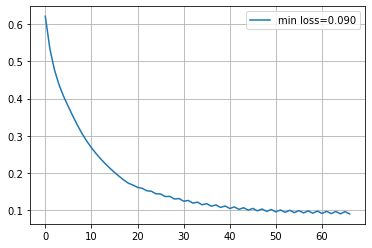

In [12]:
# история изменения ошибки
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

## тестируем 

In [14]:
m=100
xx = np.linspace(X.min(),X.max(),m).reshape((m,1))

# значение регрессии для xx
yy = model(poly.transform(xx),w)

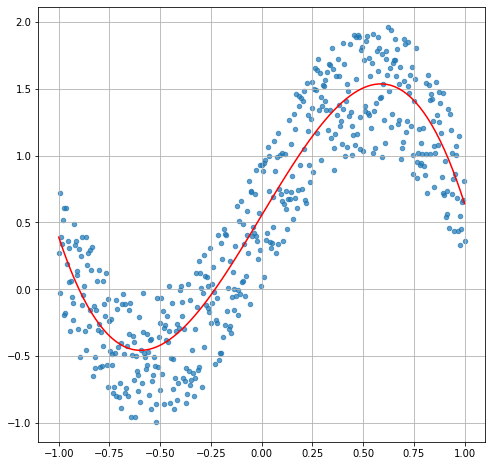

In [15]:
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.plot(xx,yy,'-r') # линия регрессии
plt.grid()
plt.show()